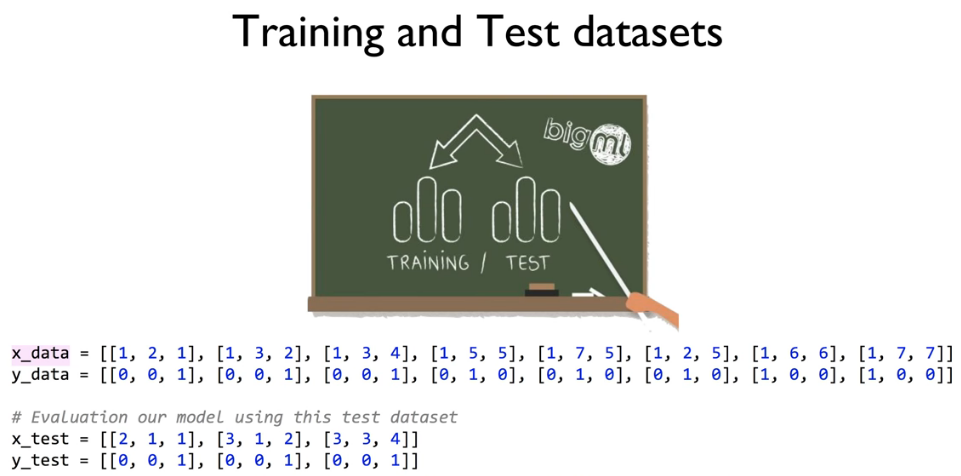

In [2]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

In [3]:
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

In [9]:
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

In [4]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [6]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [7]:
# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [10]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 5.73203 [[ 0.7288166   0.7153621  -1.1801533 ]
 [-0.57753736 -0.12988332  1.6072978 ]
 [ 0.48373488 -0.51433605 -2.02127   ]]
1 3.317995 [[ 0.6621908   0.7479632  -1.1461285 ]
 [-0.8194891   0.03000021  1.689366  ]
 [ 0.23214608 -0.33772916 -1.9462881 ]]
2 2.0218027 [[ 0.6434202   0.74127686 -1.1206716 ]
 [-0.81161296 -0.00900121  1.7204912 ]
 [ 0.2086665  -0.3507957  -1.909742  ]]
3 1.9710886 [[ 0.6235321   0.7400824  -1.099589  ]
 [-0.8096771  -0.01636279  1.725917  ]
 [ 0.17870612 -0.33665746 -1.8939198 ]]
4 1.9446774 [[ 0.60733104  0.7366499  -1.0799555 ]
 [-0.7900784  -0.03363196  1.7235874 ]
 [ 0.16691469 -0.3340635  -1.8847224 ]]
5 1.9235673 [[ 0.59031737  0.7351024  -1.0613943 ]
 [-0.7749677  -0.0404885   1.7153332 ]
 [ 0.150766   -0.322094   -1.8805432 ]]
6 1.9035923 [[ 0.57437915  0.7326286  -1.0429822 ]
 [-0.75527775 -0.05152002  1.7066748 ]
 [ 0.13977794 -0.31497926 -1.8766699 ]]
7 1.8840803 [[ 0.5581266   0.7307179  -1.024819  ]
 [-0.73775685 -0.05928205  1.696916  ]
 [ 

168 0.72333664 [[-0.9859616   0.31648093  0.9335065 ]
 [ 0.3249632   0.14312159  0.43179214]
 [-0.3706791  -0.4123957  -1.2687957 ]]
169 0.7213476 [[-0.9917175   0.3150991   0.9406442 ]
 [ 0.32695013  0.14499627  0.42793053]
 [-0.37049723 -0.4135931  -1.2677802 ]]
170 0.71938586 [[-0.9974483   0.3137355   0.9477386 ]
 [ 0.3289092   0.14684317  0.4241246 ]
 [-0.37029347 -0.4147662  -1.2668109 ]]
171 0.717451 [[-1.0031543   0.31239006  0.95478994]
 [ 0.33084068  0.14866236  0.4203739 ]
 [-0.37006807 -0.41591534 -1.2658871 ]]
172 0.7155423 [[-1.0088356   0.3110626   0.9617987 ]
 [ 0.3327449   0.15045421  0.41667783]
 [-0.3698213  -0.41704082 -1.2650084 ]]
173 0.7136595 [[-1.0144925   0.309753    0.9687653 ]
 [ 0.33462203  0.15221897  0.41303593]
 [-0.3695535  -0.41814294 -1.2641741 ]]
174 0.7118019 [[-1.0201253   0.30846107  0.97569007]
 [ 0.33647245  0.15395686  0.4094476 ]
 [-0.3692648  -0.4192221  -1.2633836 ]]
175 0.70996916 [[-1.0257342   0.3071867   0.9825734 ]
 [ 0.33829635  0.1556

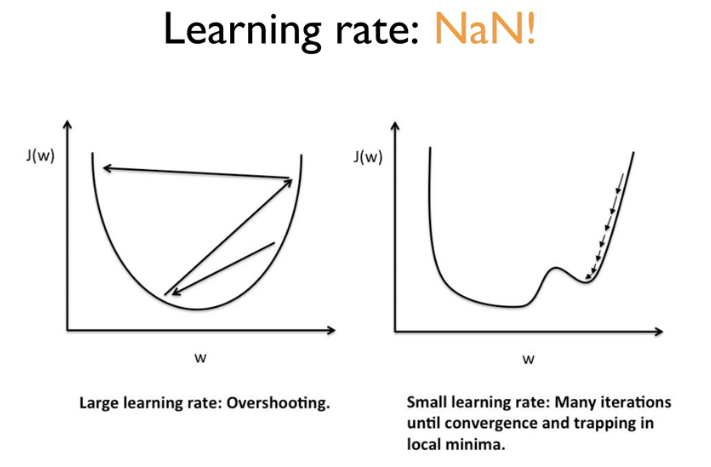

In [13]:
# In case of learning rate = 1.5

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 2.9553423 [[-0.7098998   0.04525834 -0.24524236]
 [ 2.589983    1.8865631  -4.094286  ]
 [ 2.1616333   2.6415656  -4.7127485 ]]
1 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
2 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
3 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
4 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
5 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
6 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
7 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
8 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
9 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
10 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
11 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
12 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
13 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
14 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
15 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
16 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
17 nan [[nan nan nan]
 [nan nan

In [14]:
# In case of learning rate = 1e-10

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
1 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
2 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
3 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
4 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
5 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
6 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
7 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]


156 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
157 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
158 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
159 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
160 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
161 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
162 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.51057845  0.4335756 ]
 [-1.360624   -0.2438508  -0.06445576]]
163 2.6509275 [[ 0.3484252  -0.54310673 -0.9071616 ]
 [ 0.27862072  0.510578

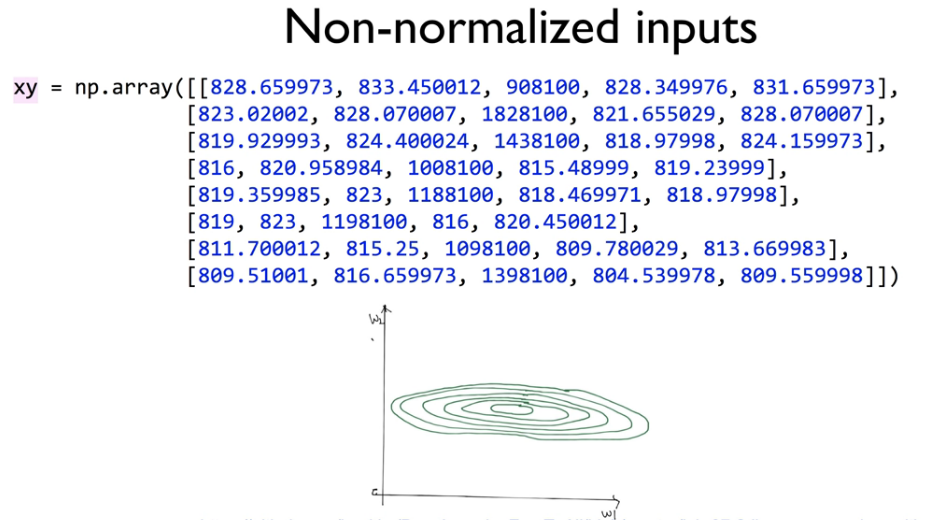

In [16]:
import numpy as np

In [17]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [18]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [19]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [20]:
# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [21]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  1130623900000.0 
Prediction:
 [[ 751083.94]
 [1510516.2 ]
 [1188573.4 ]
 [ 833609.5 ]
 [ 982202.06]
 [ 990454.44]
 [ 907894.4 ]
 [1155531.8 ]]
1 Cost:  1.2421946e+27 
Prediction:
 [[-2.4861433e+13]
 [-5.0048608e+13]
 [-3.9371437e+13]
 [-2.7599166e+13]
 [-3.2527094e+13]
 [-3.2800867e+13]
 [-3.0063129e+13]
 [-3.8276342e+13]]
2 Cost:  inf 
Prediction:
 [[8.2406570e+20]
 [1.6589288e+21]
 [1.3050195e+21]
 [9.1481169e+20]
 [1.0781545e+21]
 [1.0872291e+21]
 [9.9648306e+20]
 [1.2687210e+21]]
3 Cost:  inf 
Prediction:
 [[-2.7314772e+28]
 [-5.4987438e+28]
 [-4.3256631e+28]
 [-3.0322667e+28]
 [-3.5736886e+28]
 [-3.6037675e+28]
 [-3.3029778e+28]
 [-4.2053472e+28]]
4 Cost:  inf 
Prediction:
 [[9.0538490e+35]
 [1.8226326e+36]
 [1.4337993e+36]
 [1.0050857e+36]
 [1.1845472e+36]
 [1.1945173e+36]
 [1.0948165e+36]
 [1.3939189e+36]]
5 Cost:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
6 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan

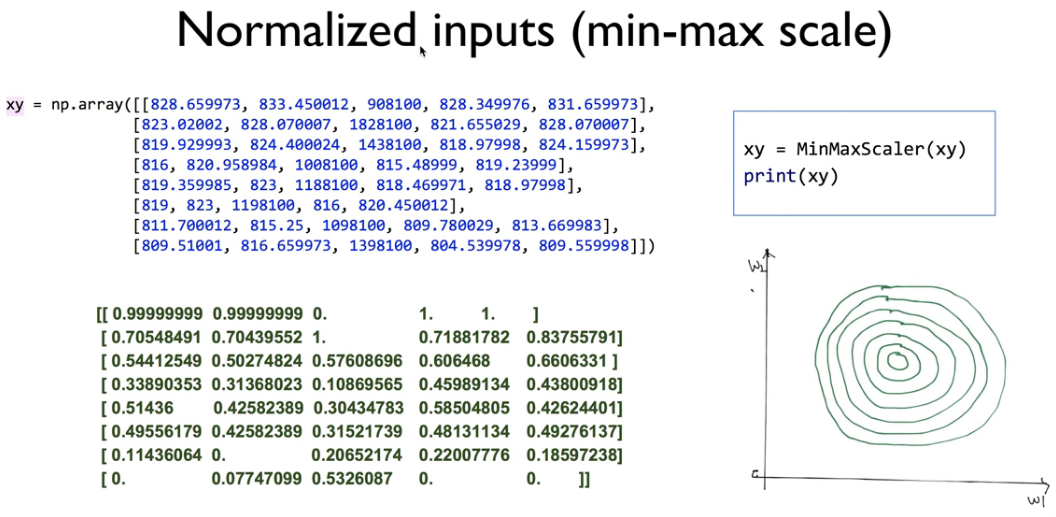

In [28]:
from sklearn.preprocessing import MinMaxScaler
xy = MinMaxScaler().fit_transform(xy)

In [29]:
xy

array([[1.        , 1.        , 0.        , 1.        , 1.        ],
       [0.70548491, 0.70439552, 1.        , 0.71881783, 0.83755792],
       [0.54412549, 0.50274824, 0.57608696, 0.60646801, 0.6606331 ],
       [0.33890353, 0.31368023, 0.10869565, 0.45989134, 0.43800918],
       [0.51436   , 0.4258239 , 0.30434783, 0.58504805, 0.42624401],
       [0.49556179, 0.4258239 , 0.31521739, 0.48131134, 0.49276137],
       [0.11436064, 0.        , 0.20652174, 0.22007776, 0.18597238],
       [0.        , 0.07747099, 0.5326087 , 0.        , 0.        ]])

In [30]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        _, cost_val, hy_val = sess.run(
            [train, cost, hypothesis], feed_dict={X: x_data, Y: y_data}
        )
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  0.5034421 
Prediction:
 [[-0.4315408 ]
 [-0.14415795]
 [ 0.00382382]
 [ 0.14092982]
 [ 0.05289868]
 [ 0.0357939 ]
 [ 0.3915167 ]
 [ 0.32303765]]
1 Cost:  0.5034159 
Prediction:
 [[-0.43150932]
 [-0.14412934]
 [ 0.00384736]
 [ 0.14094768]
 [ 0.05292028]
 [ 0.03581464]
 [ 0.39152914]
 [ 0.3230493 ]]
2 Cost:  0.5033896 
Prediction:
 [[-0.43147784]
 [-0.14410079]
 [ 0.00387093]
 [ 0.14096557]
 [ 0.05294192]
 [ 0.03583539]
 [ 0.3915416 ]
 [ 0.32306093]]
3 Cost:  0.5033634 
Prediction:
 [[-0.4314463 ]
 [-0.14407223]
 [ 0.00389448]
 [ 0.14098343]
 [ 0.05296361]
 [ 0.03585613]
 [ 0.39155406]
 [ 0.32307258]]
4 Cost:  0.503337 
Prediction:
 [[-0.43141484]
 [-0.14404362]
 [ 0.00391805]
 [ 0.14100131]
 [ 0.05298522]
 [ 0.0358769 ]
 [ 0.39156651]
 [ 0.32308424]]
5 Cost:  0.50331074 
Prediction:
 [[-0.4313833 ]
 [-0.14401495]
 [ 0.00394163]
 [ 0.14101914]
 [ 0.05300689]
 [ 0.03589764]
 [ 0.39157897]
 [ 0.3230959 ]]
6 Cost:  0.50328445 
Prediction:
 [[-0.4313519 ]
 [-0.14398634]
 [ 0.0039651